[View in Colaboratory](https://colab.research.google.com/github/skhimsara/CNN/blob/master/Dogs_vs_Cats.ipynb)

In [2]:
!pip install kaggle
!kaggle competitions download  -c dogs-vs-cats -p /content/kaggle/dogs-vs-cats/data

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/e2/a8/99/e3a854f62f19e827ead20700eb9ca0ebba65baba2cb0a06468
Successfully built kaggle
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Unauthorized: you must download an API key from https://www.kaggle.com/<username>/account
Then put kaggle.json in the folder /content/.kaggle


In [6]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
!cp kaggle.json  .kaggle
!chmod 600 /content/.kaggle/kaggle.json
!kaggle competitions download  -c dogs-vs-cats -p /content/myWorkspace/dogs-vs-cats/data/

sampleSubmission.csv: Downloaded 87KB of 87KB
test1.zip: Downloaded 271MB of 271MB
train.zip: Downloaded 543MB of 543MB


In [0]:
import zipfile
zip = zipfile.ZipFile(r'/content/myWorkspace/dogs-vs-cats/data/test1.zip')  
zip.extractall(r'/content/myWorkspace/dogs-vs-cats/data/') 
zip = zipfile.ZipFile(r'/content/myWorkspace/dogs-vs-cats/data/train.zip')  
zip.extractall(r'/content/myWorkspace/dogs-vs-cats/data/') 

!mv  /content/myWorkspace/dogs-vs-cats/data/test1/*.* /content/myWorkspace/dogs-vs-cats/data
!mv  /content/myWorkspace/dogs-vs-cats/data/train/*.* /content/myWorkspace/dogs-vs-cats/data



In [0]:
import os, shutil
original_dataset_dir = '/content/myWorkspace/dogs-vs-cats/data/'
base_dir = '/content/myWorkspace/dogs-vs-cats/small_data/'

#train_dir = "/content/myWorkspace/dogs-vs-cats/small_data/train/"
#test_dir = "/content/myWorkspace/dogs-vs-cats/small_data/test/"
#validation_dir  ="/content/myWorkspace/dogs-vs-small_data/validation/"

os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')                                
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')                      
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')                                  
os.makedirs(test_dir, exist_ok=True)

train_cats_dir = os.path.join(train_dir, 'cats')                           
os.makedirs(train_cats_dir, exist_ok=True)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.makedirs(train_dogs_dir, exist_ok=True)                                                   

validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.makedirs(validation_cats_dir, exist_ok=True)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.makedirs(validation_dogs_dir, exist_ok=True) 

test_cats_dir = os.path.join(test_dir, 'cats')                             
os.makedirs(test_cats_dir, exist_ok=True)                                                    

test_dogs_dir = os.path.join(test_dir, 'dogs')                             
os.makedirs(test_dogs_dir, exist_ok=True)   

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                    
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]              
for fname in fnames:                                                      
    src = os.path.join(original_dataset_dir, fname)                       
    dst = os.path.join(validation_cats_dir, fname)                        
    shutil.copyfile(src, dst)                                             

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]              
for fname in fnames:                                                      
    src = os.path.join(original_dataset_dir, fname)                       
    dst = os.path.join(test_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                             

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                    
for fname in fnames:                                                      
    src = os.path.join(original_dataset_dir, fname)                       
    dst = os.path.join(train_dogs_dir, fname)                             
    shutil.copyfile(src, dst)                                             
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]              
for fname in fnames:                                                      
    src = os.path.join(original_dataset_dir, fname)                       
    dst = os.path.join(validation_dogs_dir, fname)                        
    shutil.copyfile(src, dst)                                             

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]              
for fname in fnames:                                                      
    src = os.path.join(original_dataset_dir, fname)                       
    dst = os.path.join(test_dogs_dir, fname)                              
    shutil.copyfile(src, dst)      

In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)             
test_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir,                                             
        target_size=(150, 150),                                 
        batch_size=20,
        class_mode='binary')                                   

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 138ms/step - loss: 0.6898 - acc: 0.5285 - val_loss: 0.6722 - val_acc: 0.6110
Epoch 2/30
100/100 [==============================] - 11s 112ms/step - loss: 0.6618 - acc: 0.6075 - val_loss: 0.6949 - val_acc: 0.5290
Epoch 3/30
100/100 [==============================] - 10s 103ms/step - loss: 0.6196 - acc: 0.6685 - val_loss: 0.6457 - val_acc: 0.6240
Epoch 4/30
 69/100 [===================>..........] - ETA: 2s - loss: 0.5734 - acc: 0.7167

100/100 [==============================] - 11s 110ms/step - loss: 0.5668 - acc: 0.7150 - val_loss: 0.5779 - val_acc: 0.6880
Epoch 5/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5352 - acc: 0.7250 - val_loss: 0.5818 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5065 - acc: 0.7420 - val_loss: 0.5674 - val_acc: 0.6930
Epoch 7/30
 91/100 [==========================>...] - ETA: 0s - loss: 0.4747 - acc: 0.7709

100/100 [==============================] - 11s 110ms/step - loss: 0.4779 - acc: 0.7700 - val_loss: 0.6689 - val_acc: 0.6600
Epoch 8/30
100/100 [==============================] - 11s 109ms/step - loss: 0.4480 - acc: 0.7935 - val_loss: 0.6100 - val_acc: 0.6870
Epoch 9/30
100/100 [==============================] - 11s 109ms/step - loss: 0.4270 - acc: 0.8075 - val_loss: 0.5885 - val_acc: 0.7130
Epoch 10/30
 94/100 [===========================>..] - ETA: 0s - loss: 0.3924 - acc: 0.8202

100/100 [==============================] - 11s 109ms/step - loss: 0.3877 - acc: 0.8230 - val_loss: 0.6807 - val_acc: 0.6680
Epoch 11/30
100/100 [==============================] - 11s 110ms/step - loss: 0.3577 - acc: 0.8430 - val_loss: 0.5691 - val_acc: 0.7210
Epoch 12/30
100/100 [==============================] - 11s 110ms/step - loss: 0.3426 - acc: 0.8510 - val_loss: 0.5642 - val_acc: 0.7270
Epoch 13/30
 94/100 [===========================>..] - ETA: 0s - loss: 0.3207 - acc: 0.8644

100/100 [==============================] - 11s 109ms/step - loss: 0.3192 - acc: 0.8650 - val_loss: 0.5773 - val_acc: 0.7150
Epoch 14/30
100/100 [==============================] - 11s 110ms/step - loss: 0.2919 - acc: 0.8810 - val_loss: 0.6399 - val_acc: 0.7210
Epoch 15/30
100/100 [==============================] - 11s 110ms/step - loss: 0.2671 - acc: 0.8980 - val_loss: 0.5831 - val_acc: 0.7480
Epoch 16/30
 91/100 [==========================>...] - ETA: 0s - loss: 0.2560 - acc: 0.9011

100/100 [==============================] - 11s 110ms/step - loss: 0.2551 - acc: 0.9015 - val_loss: 0.6699 - val_acc: 0.7150
Epoch 17/30
100/100 [==============================] - 11s 110ms/step - loss: 0.2239 - acc: 0.9145 - val_loss: 0.6559 - val_acc: 0.7300
Epoch 18/30
100/100 [==============================] - 11s 109ms/step - loss: 0.2067 - acc: 0.9265 - val_loss: 0.6301 - val_acc: 0.7300
Epoch 19/30
 95/100 [===========================>..] - ETA: 0s - loss: 0.1826 - acc: 0.9368

100/100 [==============================] - 11s 110ms/step - loss: 0.1828 - acc: 0.9360 - val_loss: 0.6696 - val_acc: 0.7250
Epoch 20/30
100/100 [==============================] - 11s 109ms/step - loss: 0.1654 - acc: 0.9360 - val_loss: 0.6513 - val_acc: 0.7540
Epoch 21/30
100/100 [==============================] - 11s 110ms/step - loss: 0.1453 - acc: 0.9485 - val_loss: 0.7375 - val_acc: 0.7340
Epoch 22/30
 92/100 [==========================>...] - ETA: 0s - loss: 0.1307 - acc: 0.9554

100/100 [==============================] - 11s 110ms/step - loss: 0.1283 - acc: 0.9570 - val_loss: 0.7889 - val_acc: 0.7330
Epoch 23/30
100/100 [==============================] - 11s 109ms/step - loss: 0.1173 - acc: 0.9600 - val_loss: 0.8011 - val_acc: 0.7320
Epoch 24/30
100/100 [==============================] - 11s 110ms/step - loss: 0.0957 - acc: 0.9775 - val_loss: 0.8255 - val_acc: 0.7340
Epoch 25/30
 96/100 [===========================>..] - ETA: 0s - loss: 0.0829 - acc: 0.9776

100/100 [==============================] - 11s 109ms/step - loss: 0.0829 - acc: 0.9770 - val_loss: 0.8760 - val_acc: 0.7130
Epoch 26/30
100/100 [==============================] - 11s 110ms/step - loss: 0.0761 - acc: 0.9775 - val_loss: 0.8475 - val_acc: 0.7430
Epoch 27/30
100/100 [==============================] - 11s 111ms/step - loss: 0.0644 - acc: 0.9830 - val_loss: 0.8939 - val_acc: 0.7270
Epoch 28/30
 91/100 [==========================>...] - ETA: 0s - loss: 0.0525 - acc: 0.9896

100/100 [==============================] - 11s 109ms/step - loss: 0.0579 - acc: 0.9865 - val_loss: 0.9017 - val_acc: 0.7380
Epoch 29/30
100/100 [==============================] - 11s 109ms/step - loss: 0.0521 - acc: 0.9890 - val_loss: 1.0771 - val_acc: 0.7190
Epoch 30/30
100/100 [==============================] - 11s 109ms/step - loss: 0.0382 - acc: 0.9910 - val_loss: 0.9988 - val_acc: 0.7370


In [0]:
model.save('cats_and_dogs_small_1.h5')

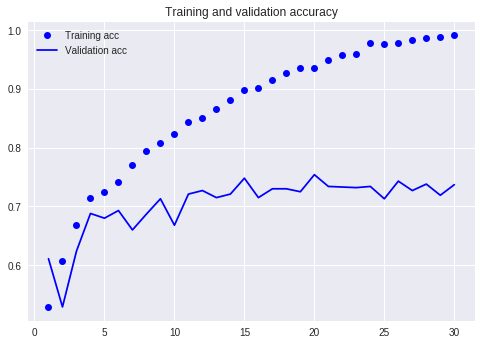

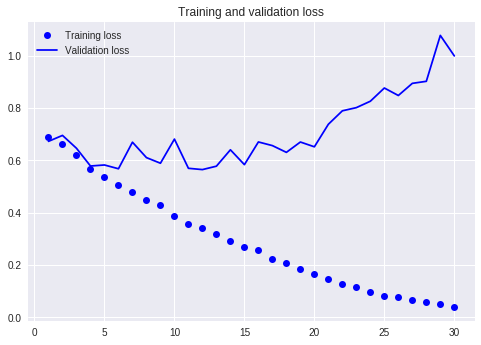

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

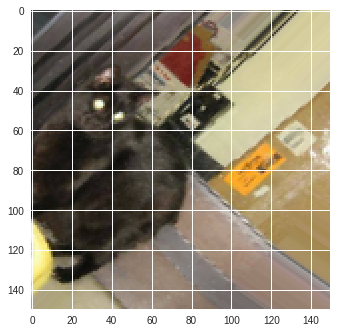

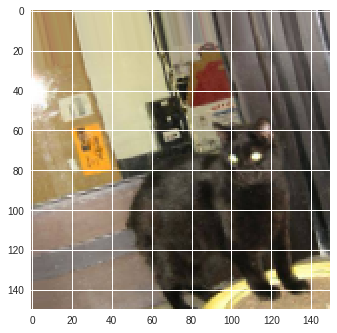

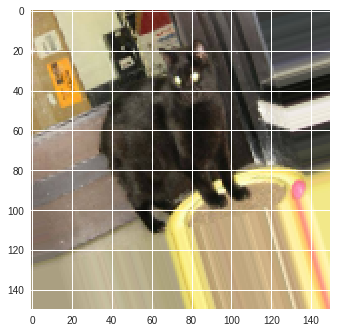

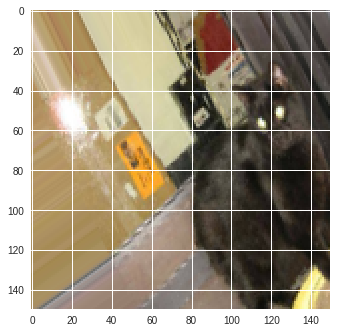

In [20]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


from keras.preprocessing import image                           

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[34]                                            

img = image.load_img(img_path, target_size=(150, 150))          

x = image.img_to_array(img)                                     
x = x.reshape((1,) + x.shape)                                   

i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size=(150, 150),                                 
        batch_size=32,
        class_mode='binary')                                    

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 36s 362ms/step - loss: 0.6359 - acc: 0.6300 - val_loss: 0.6090 - val_acc: 0.6574
Epoch 2/30
100/100 [==============================] - 33s 331ms/step - loss: 0.6323 - acc: 0.6431 - val_loss: 0.6223 - val_acc: 0.6225
Epoch 3/30
100/100 [==============================] - 33s 330ms/step - loss: 0.6081 - acc: 0.6637 - val_loss: 0.5795 - val_acc: 0.7005
Epoch 4/30
 12/100 [==>...........................] - ETA: 5s - loss: 0.6176 - acc: 0.6771

100/100 [==============================] - 34s 337ms/step - loss: 0.6051 - acc: 0.6737 - val_loss: 0.6039 - val_acc: 0.6574
Epoch 5/30
100/100 [==============================] - 32s 319ms/step - loss: 0.5975 - acc: 0.6809 - val_loss: 0.5854 - val_acc: 0.6802
Epoch 6/30
100/100 [==============================] - 35s 352ms/step - loss: 0.5868 - acc: 0.6859 - val_loss: 0.5691 - val_acc: 0.6980
Epoch 7/30
 75/100 [=====================>........] - ETA: 6s - loss: 0.5874 - acc: 0.6954

100/100 [==============================] - 33s 332ms/step - loss: 0.5807 - acc: 0.6981 - val_loss: 0.5380 - val_acc: 0.7240
Epoch 8/30
100/100 [==============================] - 33s 332ms/step - loss: 0.5692 - acc: 0.7003 - val_loss: 0.5571 - val_acc: 0.6904
Epoch 9/30
100/100 [==============================] - 33s 332ms/step - loss: 0.5744 - acc: 0.6931 - val_loss: 0.5792 - val_acc: 0.6954
Epoch 10/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.5492 - acc: 0.7188

100/100 [==============================] - 32s 323ms/step - loss: 0.5523 - acc: 0.7175 - val_loss: 0.5538 - val_acc: 0.7157
Epoch 11/30
100/100 [==============================] - 35s 346ms/step - loss: 0.5609 - acc: 0.7025 - val_loss: 0.5401 - val_acc: 0.7373
Epoch 12/30
100/100 [==============================] - 33s 333ms/step - loss: 0.5430 - acc: 0.7231 - val_loss: 0.5207 - val_acc: 0.7297
Epoch 13/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.5539 - acc: 0.7195

100/100 [==============================] - 33s 330ms/step - loss: 0.5528 - acc: 0.7188 - val_loss: 0.5370 - val_acc: 0.7145
Epoch 14/30
100/100 [==============================] - 33s 329ms/step - loss: 0.5309 - acc: 0.7312 - val_loss: 0.5584 - val_acc: 0.7005
Epoch 15/30
100/100 [==============================] - 33s 335ms/step - loss: 0.5317 - acc: 0.7369 - val_loss: 0.6136 - val_acc: 0.6789
Epoch 16/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.5272 - acc: 0.7294

100/100 [==============================] - 33s 332ms/step - loss: 0.5268 - acc: 0.7294 - val_loss: 0.5064 - val_acc: 0.7418
Epoch 17/30
100/100 [==============================] - 31s 314ms/step - loss: 0.5287 - acc: 0.7319 - val_loss: 0.4893 - val_acc: 0.7544
Epoch 18/30
100/100 [==============================] - 36s 359ms/step - loss: 0.5352 - acc: 0.7309 - val_loss: 0.5659 - val_acc: 0.7005
Epoch 19/30
 86/100 [========================>.....] - ETA: 3s - loss: 0.5280 - acc: 0.7333

100/100 [==============================] - 33s 330ms/step - loss: 0.5228 - acc: 0.7375 - val_loss: 0.4836 - val_acc: 0.7589
Epoch 20/30
100/100 [==============================] - 33s 329ms/step - loss: 0.5171 - acc: 0.7437 - val_loss: 0.5000 - val_acc: 0.7481
Epoch 21/30
100/100 [==============================] - 33s 329ms/step - loss: 0.5111 - acc: 0.7450 - val_loss: 0.5047 - val_acc: 0.7405
Epoch 22/30
 84/100 [========================>.....] - ETA: 4s - loss: 0.5141 - acc: 0.7385

100/100 [==============================] - 32s 324ms/step - loss: 0.5141 - acc: 0.7375 - val_loss: 0.4869 - val_acc: 0.7671
Epoch 23/30
100/100 [==============================] - 35s 351ms/step - loss: 0.5049 - acc: 0.7500 - val_loss: 0.5306 - val_acc: 0.7259
Epoch 24/30
100/100 [==============================] - 33s 328ms/step - loss: 0.4935 - acc: 0.7572 - val_loss: 0.4958 - val_acc: 0.7538
Epoch 25/30
 85/100 [========================>.....] - ETA: 3s - loss: 0.5065 - acc: 0.7529

100/100 [==============================] - 34s 337ms/step - loss: 0.5020 - acc: 0.7550 - val_loss: 0.4874 - val_acc: 0.7589
Epoch 26/30
100/100 [==============================] - 33s 332ms/step - loss: 0.4980 - acc: 0.7497 - val_loss: 0.4810 - val_acc: 0.7614
Epoch 27/30
100/100 [==============================] - 33s 328ms/step - loss: 0.4986 - acc: 0.7644 - val_loss: 0.4916 - val_acc: 0.7551
Epoch 28/30
 85/100 [========================>.....] - ETA: 4s - loss: 0.4895 - acc: 0.7651

100/100 [==============================] - 34s 338ms/step - loss: 0.4867 - acc: 0.7681 - val_loss: 0.4637 - val_acc: 0.7690
Epoch 29/30
100/100 [==============================] - 34s 335ms/step - loss: 0.4823 - acc: 0.7663 - val_loss: 0.5143 - val_acc: 0.7513
Epoch 30/30
100/100 [==============================] - 33s 334ms/step - loss: 0.4837 - acc: 0.7660 - val_loss: 0.5293 - val_acc: 0.7284


In [0]:
model.save('cats_and_dogs_small_2.h5')


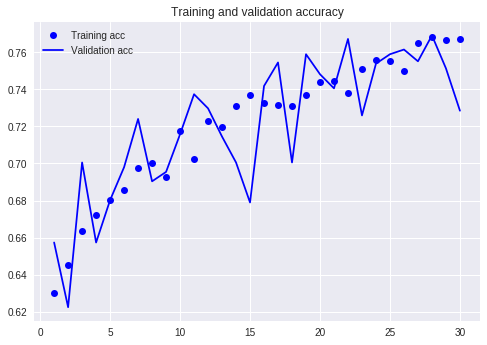

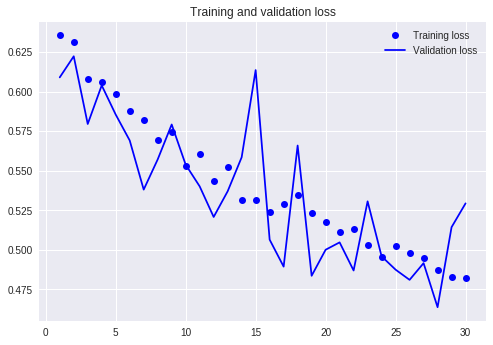

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()